In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
qb = pd.read_csv('input/qb/dk_stats_loc.csv')


In [9]:
qb.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [50]:
qb.replace('null',0, inplace=True)

In [15]:
qb.isnull().sum()

PlayerID                       0
Name                           0
Team                           0
Week                           0
Opponent                       0
PassingCompletions             0
PassingAttempts                0
PassingCompletionPercentage    0
PassingYards                   0
PassingYardsPerAttempt         0
PassingTouchdowns              0
PassingInterceptions           0
PassingRating                  0
RushingAttempts                0
RushingYards                   0
RushingYardsPerAttempt         0
RushingTouchdowns              0
FantasyPointsDraftKings        0
salary                         0
year                           0
def_rk                         0
h/a                            0
surface                        0
dtype: int64

In [16]:
points = rodgers['FantasyPointsDraftKings']

In [37]:
qb_2015 = qb[qb['year']==2015]
week2_2015 = qb_2015[qb_2015['Week']==1]

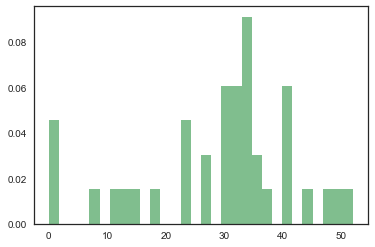

In [38]:
n, bins, patches = plt.hist(week1_2015['PassingAttempts'], 30, density=True, facecolor='g', alpha=0.75)


In [51]:
qb['salary'] = qb['salary'].apply(lambda x: int(x))

In [52]:
qb['salary'].mean()

5769.599109131404

In [53]:
qb_2016 = qb[qb['year']==2016]

qb_2017 = qb[qb['year']==2017]